 # Project 7: Explanatory Data Analysis & Advanced Visualization (Baby Names Dataset)

# Project Brief for Self-Coders

Here you´ll have the opportunity to code major parts of Project 7 on your own. If you need any help or inspiration, have a look at the Videos or the Jupyter Notebook with the full code. <br> <br>
Keep in mind that it´s all about __getting the right results/conclusions__. It´s not about finding the identical code. Things can be coded in many different ways. Even if you come to the same conclusions, it´s very unlikely that we have the very same code. 

## First Inspection: The most popular Names in 2018

1. __Load__ and __inspect__ the dataset "us_baby_names.csv". __Save__ the DataFrame in __df__.

2. Find the most popular __Baby Girl Names__ in __2018__. 

3. Find the most popular __Baby Boy Names__ in __2018__.

4. __Create__ the function __most_pop(year, gender, n)__ that returns the __n__ most popular __M/F__ Names in the __year XYZ__.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("us_baby_names.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1957046 entries, 0 to 1957045
Data columns (total 4 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Year    int64 
 1   Name    object
 2   Gender  object
 3   Count   int64 
dtypes: int64(2), object(2)
memory usage: 59.7+ MB


In [4]:
df.nunique()

Year        139
Name      98400
Gender        2
Count     13720
dtype: int64

In [5]:
df

,Year,Name,Gender,Count
0,1880,Mary,F,7065
1,1880,Anna,F,2604
2,1880,Emma,F,2003
3,1880,Elizabeth,F,1939
4,1880,Minnie,F,1746
...,...,...,...,...
1957041,2018,Zylas,M,5
1957042,2018,Zyran,M,5
1957043,2018,Zyrie,M,5
1957044,2018,Zyron,M,5


In [12]:
df.Gender = df.Gender.astype("category")

In [18]:
df[(df.Year == 2018) & (df.Gender == 'F')].nlargest(2, "Count")

,Year,Name,Gender,Count
1925013,2018,Emma,F,18688
1925014,2018,Olivia,F,17921


In [19]:
def most_popular(year, gender, n):
    return df[(df.Year == year) & (df.Gender == gender)].nlargest(n, "Count")

In [20]:
most_popular(2018, "F", 2)

,Year,Name,Gender,Count
1925013,2018,Emma,F,18688
1925014,2018,Olivia,F,17921


In [21]:
most_popular(2018, "M", 2)

,Year,Name,Gender,Count
1943042,2018,Liam,M,19837
1943043,2018,Noah,M,18267


## Evergreen Names (1880 - 2018)

5. Find those __Evergreen Boy Names__ that are in __1880 and 2018__ among the most popular Boy Names (__Top 20__).

6. Find those __Evergreen Girl Names__ that are in __1880 and 2018__ among the most popular Girl Names (__Top 20__).

In [22]:
f_2018 = most_popular(2018, "F", 20)
f_2018

,Year,Name,Gender,Count
1925013,2018,Emma,F,18688
1925014,2018,Olivia,F,17921
1925015,2018,Ava,F,14924
1925016,2018,Isabella,F,14464
1925017,2018,Sophia,F,13928
1925018,2018,Charlotte,F,12940
1925019,2018,Mia,F,12642
1925020,2018,Amelia,F,12301
1925021,2018,Harper,F,10582
1925022,2018,Evelyn,F,10376


In [23]:
f_1880 = most_popular(1880, "F", 20)
f_1880

,Year,Name,Gender,Count
0,1880,Mary,F,7065
1,1880,Anna,F,2604
2,1880,Emma,F,2003
3,1880,Elizabeth,F,1939
4,1880,Minnie,F,1746
5,1880,Margaret,F,1578
6,1880,Ida,F,1472
7,1880,Alice,F,1414
8,1880,Bertha,F,1320
9,1880,Sarah,F,1288


In [25]:
f_evergreen = f_2018[["Name", "Count"]].merge(f_1880[["Name", "Count"]], how="inner", on="Name", suffixes=("_2018", "_1880"))
f_evergreen

,Name,Count_2018,Count_1880
0,Emma,18688,2003
1,Elizabeth,8513,1939
2,Ella,8055,1156


In [27]:
m_2018 = most_popular(2018, "M", 20)
m_2018

,Year,Name,Gender,Count
1943042,2018,Liam,M,19837
1943043,2018,Noah,M,18267
1943044,2018,William,M,14516
1943045,2018,James,M,13525
1943046,2018,Oliver,M,13389
1943047,2018,Benjamin,M,13381
1943048,2018,Elijah,M,12886
1943049,2018,Lucas,M,12585
1943050,2018,Mason,M,12435
1943051,2018,Logan,M,12352


In [28]:
m_1880 = most_popular(1880, "M", 20)
m_1880

,Year,Name,Gender,Count
942,1880,John,M,9655
943,1880,William,M,9532
944,1880,James,M,5927
945,1880,Charles,M,5348
946,1880,George,M,5126
947,1880,Frank,M,3242
948,1880,Joseph,M,2632
949,1880,Thomas,M,2534
950,1880,Henry,M,2444
951,1880,Robert,M,2415


In [29]:
m_evergreen = m_2018[["Name", "Count"]].merge(m_1880[["Name", "Count"]], how="inner", on="Name", suffixes=("_2018", "_1880"))
m_evergreen

,Name,Count_2018,Count_1880
0,William,14516,9532
1,James,13525,5927
2,Henry,10649,2444


## Advanced Data Aggregation

7. Create the following __aggregated DataFrame agg__ (you can see the first and last 5 rows):

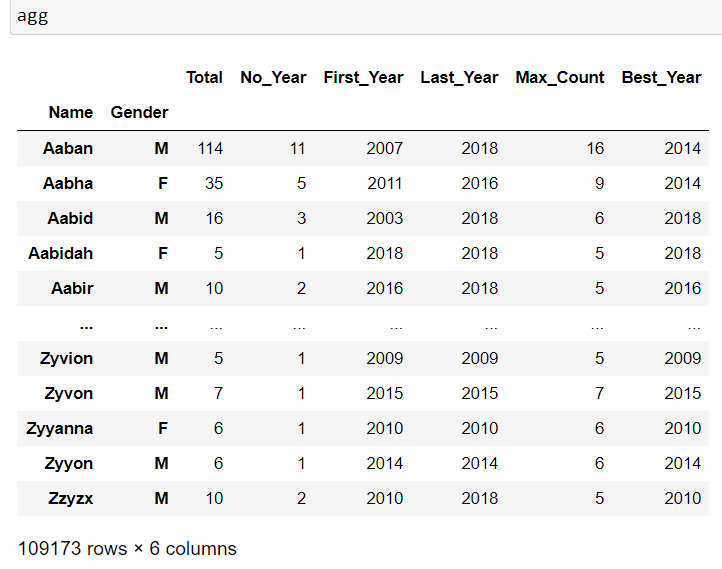

__How to interpret agg (and the first observation Aaban, M):__<br>
- There are in total 114 Male Babies with the name Aaban (Total)<br>
- The combination/entry (Aaban, M) can be found in 11 different years (No_Year)<br>
- The combination/entry (Aaban, M) appeared in the year 2007 for the first time (First_Year)<br>
- The last appearance was in the year 2018 (Last_Year)<br>
- In the most popular year, (Aaban, M) appeared 16 times (Max_Count)
- The most popular year for (Aaban, M) (Best_Year)

8. __Reset__ the Index and create a RangeIndex.

9. __Filter__ agg for the combination (Mary, F)

In [30]:
df = pd.read_csv("us_baby_names.csv")

In [31]:
df.groupby(["Name", "Gender"]).Count.sum().reset_index(level = -1)

,Gender,Count
Name,,
Aaban,M,114
Aabha,F,35
Aabid,M,16
Aabidah,F,5
Aabir,M,10
...,...,...
Zyvion,M,5
Zyvon,M,7
Zyyanna,F,6


In [32]:
agg = df.groupby(["Name", "Gender"]).agg(Total = ("Count", "sum"), No_Year = ("Count", "count"), First_Year = ("Year", "min"), Last_Year = ("Year", "max"), Max_Count = ("Count", "max"))
agg

,,Total,No_Year,First_Year,Last_Year,Max_Count
Name,Gender,,,,,
Aaban,M,114,11,2007,2018,16
Aabha,F,35,5,2011,2016,9
Aabid,M,16,3,2003,2018,6
Aabidah,F,5,1,2018,2018,5
Aabir,M,10,2,2016,2018,5
...,...,...,...,...,...,...
Zyvion,M,5,1,2009,2009,5
Zyvon,M,7,1,2015,2015,7
Zyyanna,F,6,1,2010,2010,6


In [36]:
def best_year(group):
    return group.nlargest(1, "Count").Year

In [37]:
best_y = df.groupby(["Name", "Gender"]).apply(best_year)

In [38]:
best_y

Name     Gender         
Aaban    M       1817711    2014
Aabha    F       1803981    2014
Aabid    M       1953741    2018
Aabidah  F       1940601    2018
Aabir    M       1890403    2016
                            ... 
Zyvion   M       1658038    2009
Zyvon    M       1856007    2015
Zyyanna  F       1675008    2010
Zyyon    M       1824324    2014
Zzyzx    M       1692111    2010
Name: Year, Length: 109173, dtype: int64

In [39]:
best_y.droplevel(-1)

Name     Gender
Aaban    M         2014
Aabha    F         2014
Aabid    M         2018
Aabidah  F         2018
Aabir    M         2016
                   ... 
Zyvion   M         2009
Zyvon    M         2015
Zyyanna  F         2010
Zyyon    M         2014
Zzyzx    M         2010
Name: Year, Length: 109173, dtype: int64

In [40]:
agg["Best_Year"] = best_y.droplevel(-1)

In [41]:
agg

,,Total,No_Year,First_Year,Last_Year,Max_Count,Best_Year
Name,Gender,,,,,,
Aaban,M,114,11,2007,2018,16,2014
Aabha,F,35,5,2011,2016,9,2014
Aabid,M,16,3,2003,2018,6,2018
Aabidah,F,5,1,2018,2018,5,2018
Aabir,M,10,2,2016,2018,5,2016
...,...,...,...,...,...,...,...
Zyvion,M,5,1,2009,2009,5,2009
Zyvon,M,7,1,2015,2015,7,2015
Zyyanna,F,6,1,2010,2010,6,2010


In [42]:
agg.reset_index(inplace = True)

In [43]:
agg

,Name,Gender,Total,No_Year,First_Year,Last_Year,Max_Count,Best_Year
0,Aaban,M,114,11,2007,2018,16,2014
1,Aabha,F,35,5,2011,2016,9,2014
2,Aabid,M,16,3,2003,2018,6,2018
3,Aabidah,F,5,1,2018,2018,5,2018
4,Aabir,M,10,2,2016,2018,5,2016
...,...,...,...,...,...,...,...,...
109168,Zyvion,M,5,1,2009,2009,5,2009
109169,Zyvon,M,7,1,2015,2015,7,2015
109170,Zyyanna,F,6,1,2010,2010,6,2010
109171,Zyyon,M,6,1,2014,2014,6,2014


In [44]:
agg[(agg.Name == "Mary") & (agg.Gender == "F")]

,Name,Gender,Total,No_Year,First_Year,Last_Year,Max_Count,Best_Year
68679,Mary,F,4125675,139,1880,2018,73985,1921


## Most Popular Names of all Times

10. __Find__ the __10 most popular__ Male and Female Names of all Times (most popular in terms of total count). See Screenshot with final result below.

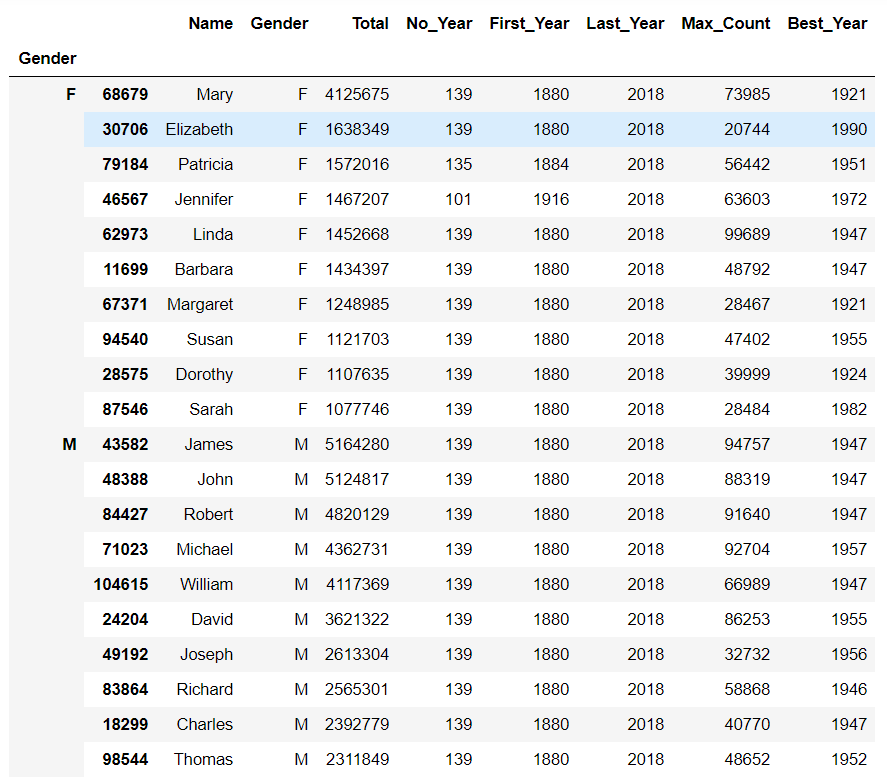

In [46]:
agg.groupby(["Gender"]).apply(lambda x: x.nlargest(10, "Total"))

Name Gender    Total  No_Year  First_Year  Last_Year  \
Gender                                                                     
F      68679        Mary      F  4125675      139        1880       2018   
       30706   Elizabeth      F  1638349      139        1880       2018   
       79184    Patricia      F  1572016      135        1884       2018   
       46567    Jennifer      F  1467207      101        1916       2018   
       62973       Linda      F  1452668      139        1880       2018   
       11699     Barbara      F  1434397      139        1880       2018   
       67371    Margaret      F  1248985      139        1880       2018   
       94540       Susan      F  1121703      139        1880       2018   
       28575     Dorothy      F  1107635      139        1880       2018   
       87546       Sarah      F  1077746      139        1880       2018   
M      43582       James      M  5164280      139        1880       2018   
       48388        John      M  5124817      139        1880       2018   
       84427      Robert      M  4820129      139        1880       2018   
       71023     Michael      M  4362731      139        1880       2018   
       104615    William      M  4117369      139        1880       2018   
       24204       David      M  3621322      139        1880       2018   
       49192      Joseph      M  2613304      139        1880       2018   
       83864     Richard      M  2565301      139        1880       2018   
       18299     Charles      M  2392779      139        1880       2018   
       98544      Thomas      M  2311849      139        1880       2018   

               Max_Count  Best_Year  
Gender                               
F      68679       73985       1921  
       30706       20744       1990  
       79184       56442       1951  
       46567       63603       1972  
       62973       99689       1947  
       11699       48792       1947  
       67371       28467       1921  
       94540       47402       1955  
       28575       39999       1924  
       87546       28484       1982  
M      43582       94757       1947  
       48388       88319       1947  
       84427       91640       1947  
       71023       92704       1957  
       104615      66989       1947  
       24204       86253       1955  
       49192       32732       1956  
       83864       58868       1946  
       18299       40770       1947  
       98544       48652       1952

In [48]:
all_times = agg.groupby(["Gender"]).apply(lambda x: x.nlargest(10, "Total")).reset_index(drop = True)
all_times

,Name,Gender,Total,No_Year,First_Year,Last_Year,Max_Count,Best_Year
0,Mary,F,4125675,139,1880,2018,73985,1921
1,Elizabeth,F,1638349,139,1880,2018,20744,1990
2,Patricia,F,1572016,135,1884,2018,56442,1951
3,Jennifer,F,1467207,101,1916,2018,63603,1972
4,Linda,F,1452668,139,1880,2018,99689,1947
5,Barbara,F,1434397,139,1880,2018,48792,1947
6,Margaret,F,1248985,139,1880,2018,28467,1921
7,Susan,F,1121703,139,1880,2018,47402,1955
8,Dorothy,F,1107635,139,1880,2018,39999,1924
9,Sarah,F,1077746,139,1880,2018,28484,1982


In [49]:
import seaborn as sns

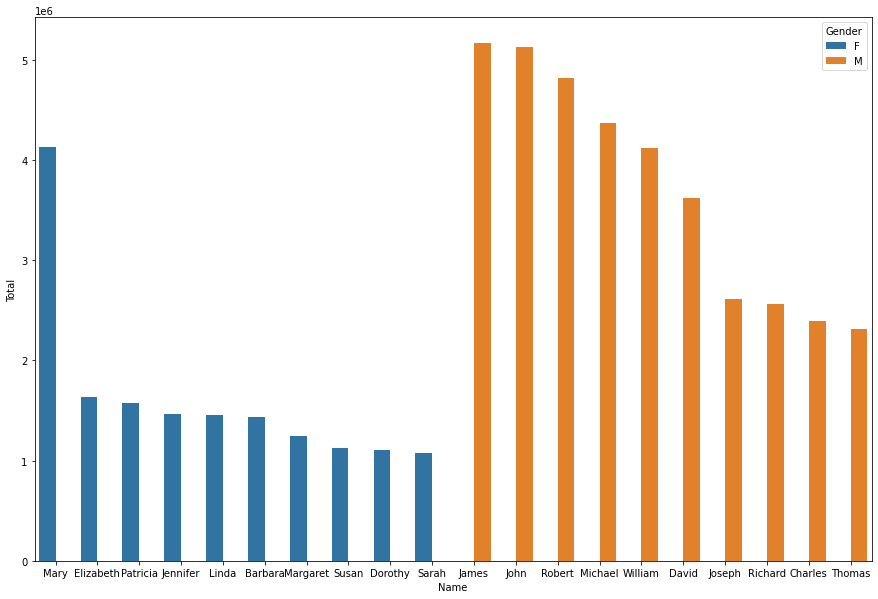

In [51]:
plt.figure(figsize = (15,10))
sns.barplot(x = "Name", y="Total", data= all_times, hue= "Gender")
plt.show()

## General Trends over time (1880 - 2018)

11. __Count__ the total number of __registered Babies per Year__ and visualize. __Create__ the following Plot:

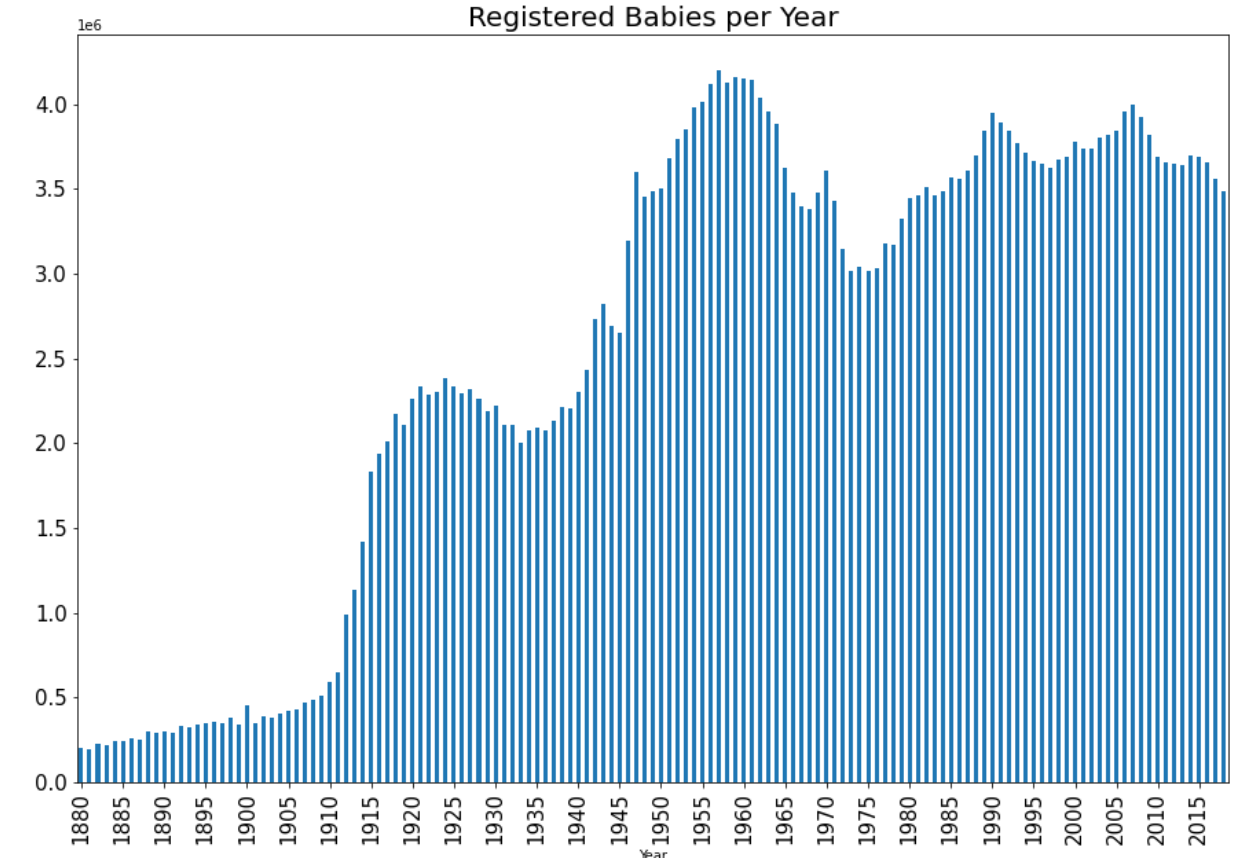

In [52]:
babies_per_year = df.groupby("Year").Count.sum()
babies_per_year

Year
1880     201484
1881     192696
1882     221533
1883     216944
1884     243461
         ...   
2014    3698914
2015    3691990
2016    3657797
2017    3561975
2018    3487353
Name: Count, Length: 139, dtype: int64

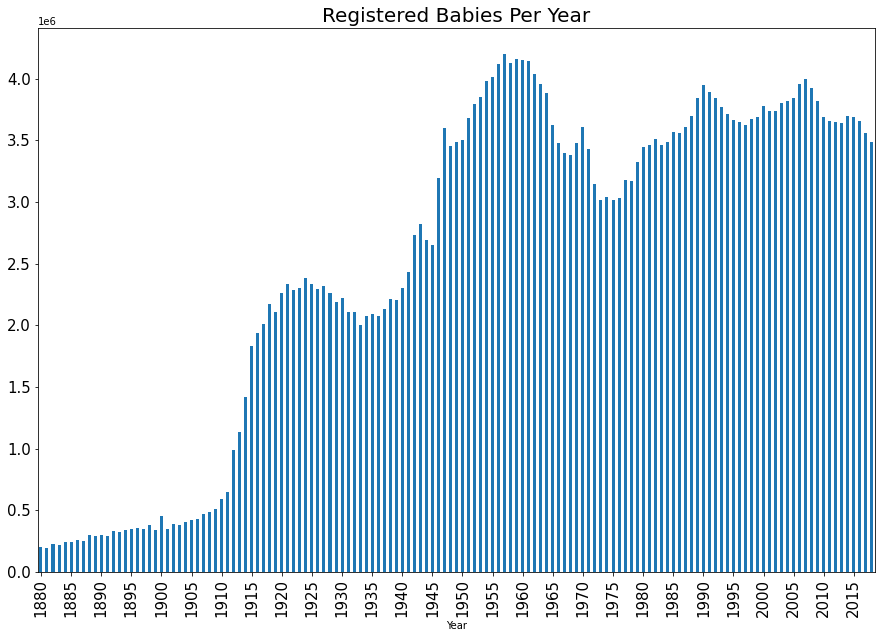

In [53]:
babies_per_year.plot(kind = "bar", y= "Count", figsize = (15,10), fontsize = 15)
plt.xticks(ticks = (range(0, len(babies_per_year), 5)), labels = range(1880, 2019, 5))
plt.title("Registered Babies Per Year", fontsize = 20)
plt.show()

In [54]:
diff_names = df.groupby("Year").Name.count()

In [55]:
diff_names

Year
1880     2000
1881     1935
1882     2127
1883     2084
1884     2297
        ...  
2014    33243
2015    33121
2016    33010
2017    32590
2018    32033
Name: Name, Length: 139, dtype: int64

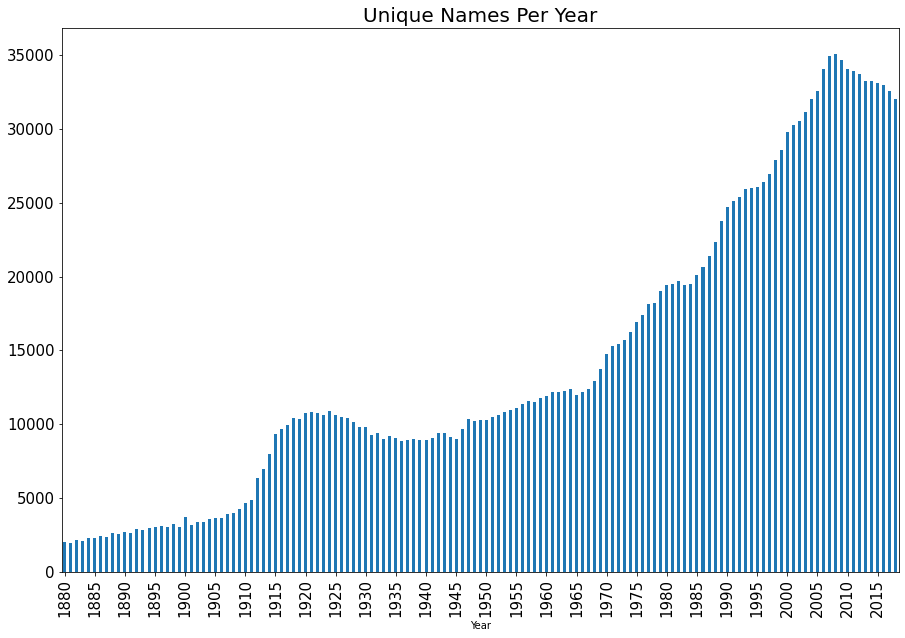

In [58]:
plt.figure(figsize = (15,10))
diff_names.plot(kind= "bar", y="Count", fontsize=15)
plt.xticks(ticks = (range(0, len(diff_names), 5)), labels = range(1880, 2019, 5))
plt.title("Unique Names Per Year", fontsize=20)
plt.show()

12. __Count__ the total number of __Unique Names per Year__ and visualize. __Create__ the following Plot:

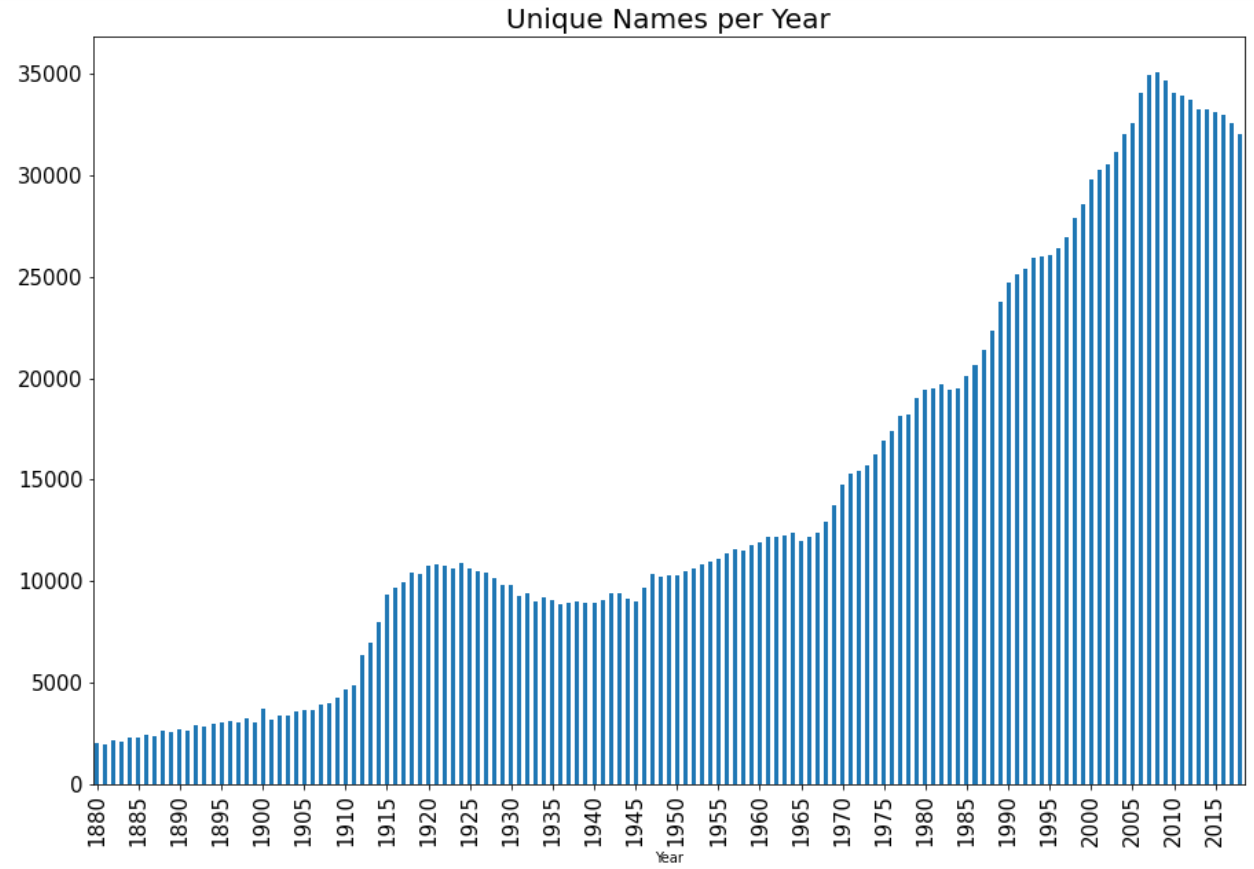

## Creating the Features "Popularity" and "Rank"

13. __Add__ the column __"Popularity"__ to df: <br> 

- Popularity in __babies per million__ (example: assume 2,000,000 registered Girl Names in 1950, thereof 100,000 Maries -> Popularity Score in 1950 for (Mary, F) is 100,000 / 2,000,000 * 1,000,000 = 50,000 per million.)  

14. __Add__ the column __"Rank"__ to df: <br> 

- Rank (example: assume Mary is the most popular Girl Name in 1950 -> Rank 1 for (Mary, F) in 1950.

After adding "Popularity" and "Rank", df should look as follows:

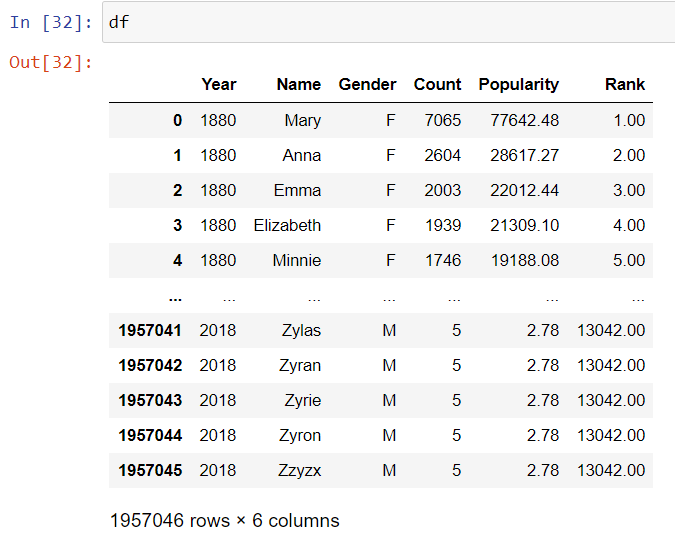

In [59]:
df.groupby(["Year", "Gender"]).Count.sum()

Year  Gender
1880  F           90994
      M          110490
1881  F           91953
      M          100743
1882  F          107847
                 ...   
2016  M         1891585
2017  F         1719138
      M         1842837
2018  F         1686961
      M         1800392
Name: Count, Length: 278, dtype: int64

In [61]:
df.Count.div(df.groupby(["Year", "Gender"]).Count.transform("sum"))*1000000

0          77642.481922
1          28617.271468
2          22012.440381
3          21309.097303
4          19188.078335
               ...     
1957041        2.777173
1957042        2.777173
1957043        2.777173
1957044        2.777173
1957045        2.777173
Name: Count, Length: 1957046, dtype: float64

In [62]:
df["Popularity"] = df.Count.div(df.groupby(["Year", "Gender"]).Count.transform("sum"))*1000000

In [63]:
df

,Year,Name,Gender,Count,Popularity
0,1880,Mary,F,7065,77642.481922
1,1880,Anna,F,2604,28617.271468
2,1880,Emma,F,2003,22012.440381
3,1880,Elizabeth,F,1939,21309.097303
4,1880,Minnie,F,1746,19188.078335
...,...,...,...,...,...
1957041,2018,Zylas,M,5,2.777173
1957042,2018,Zyran,M,5,2.777173
1957043,2018,Zyrie,M,5,2.777173
1957044,2018,Zyron,M,5,2.777173


## Rank

In [64]:
df.groupby(["Year", "Gender"]).Count.apply(lambda x: x.rank(ascending = False))

0              1.0
1              2.0
2              3.0
3              4.0
4              5.0
            ...   
1957041    13042.0
1957042    13042.0
1957043    13042.0
1957044    13042.0
1957045    13042.0
Name: Count, Length: 1957046, dtype: float64

In [65]:
df["Rank"] = df.groupby(["Year", "Gender"]).Count.apply(lambda x: x.rank(ascending = False))

In [66]:
df

,Year,Name,Gender,Count,Popularity,Rank
0,1880,Mary,F,7065,77642.481922,1.0
1,1880,Anna,F,2604,28617.271468,2.0
2,1880,Emma,F,2003,22012.440381,3.0
3,1880,Elizabeth,F,1939,21309.097303,4.0
4,1880,Minnie,F,1746,19188.078335,5.0
...,...,...,...,...,...,...
1957041,2018,Zylas,M,5,2.777173,13042.0
1957042,2018,Zyran,M,5,2.777173,13042.0
1957043,2018,Zyrie,M,5,2.777173,13042.0
1957044,2018,Zyron,M,5,2.777173,13042.0


## Visualizing Name Trends over Time

15. __Visualize__ Popularity and Rank over time (see example below).

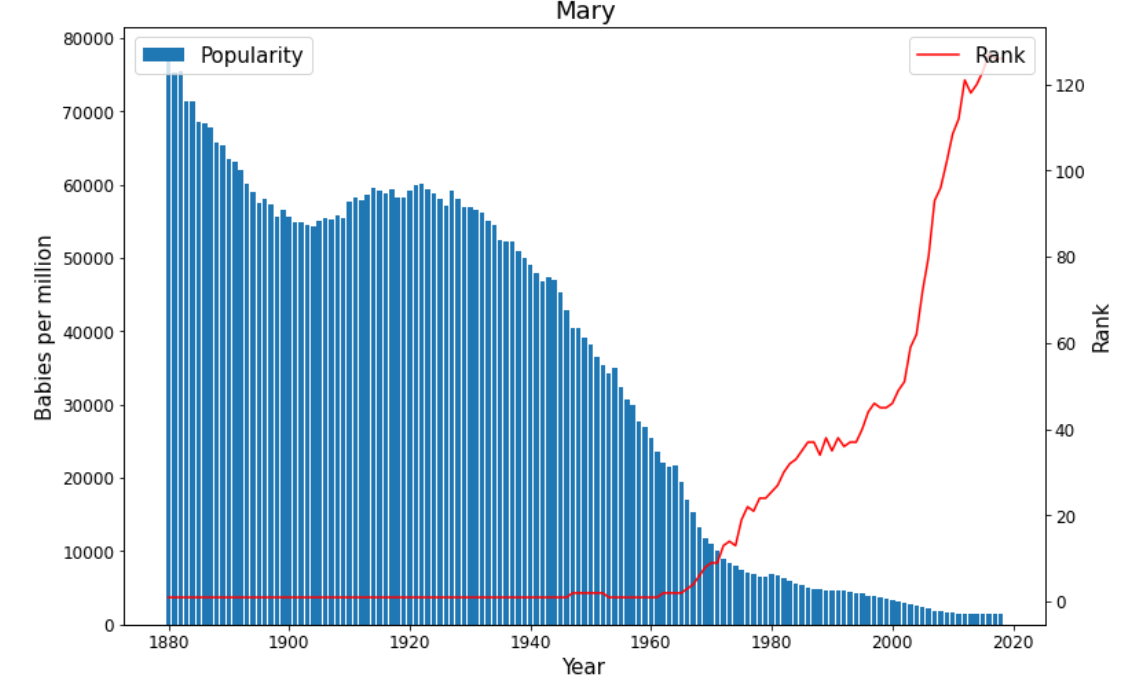

16. __Create__ this plot for all __Evergreen Names__ (see Questions 5. and 6.) (a reusable user-defined function might help)

In [67]:
mary = df[(df.Name == "Mary") & (df.Gender == "F")]
mary.head(60)

,Year,Name,Gender,Count,Popularity,Rank
0,1880,Mary,F,7065,77642.481922,1.0
2000,1881,Mary,F,6919,75244.962100,1.0
3935,1882,Mary,F,8148,75551.475702,1.0
6062,1883,Mary,F,8012,71332.543915,1.0
8146,1884,Mary,F,9217,71439.090367,1.0
10443,1885,Mary,F,9128,68603.209199,1.0
12737,1886,Mary,F,9889,68420.360748,1.0
15129,1887,Mary,F,9888,67734.842205,1.0
17502,1888,Mary,F,11754,65803.764374,1.0
20153,1889,Mary,F,11648,65303.925636,1.0


In [ ]:
fig, ax1 = plt.subplots(fig)

# Why does a Name´s Popularity suddenly change? (Part 1)

17. __Add__ the additional columns __"Pop_lag1"__ (Popularity one year ago) and __"Pop_diff"__ (change in popularity from previous year to this year) to df.  

18. __Create__ df2 starting with the __year 1900__ (from 1900 till today).

19. __Filter__ df2 and find the __20 largest values__ in "Pop_diff" (get complete rows).

20. __Create__ the popularity/rank plot (see 15. and 16.) for the Names filtered in 19.

21. __Search__ the Web for the Names __"Linda"__, __"Shirley"__ and __"Jason"__ and __find out__ why the popularity suddenly changed/spiked.

In [71]:
df.loc[(df.Name == "Mary") & (df.Gender == "F"), "Popularity"].shift()

0                   NaN
2000       77642.481922
3935       75244.962100
6062       75551.475702
8146       71332.543915
               ...     
1793168     1513.715369
1826414     1476.702107
1859539     1477.713818
1892548     1419.988088
1925138     1397.211859
Name: Popularity, Length: 139, dtype: float64

In [72]:
df["Pop_lag1"] = df.groupby(["Name", "Gender"]).Popularity.shift()

## Why does a Name´s Popularity suddenly change? (Part 2)

_No additional assignments on this. Watch the video for some more examples._

## Persistant vs. Spike-Fade Names

_No additional assignments on this. Watch the video for some more advanced examples._

## Most Popular Unisex Names

22. __Find__ the most popular __Unisex Names__ of all times. (Unisex names are names given to Boys and Girls).  

# +++++++++ See some Hints below +++++++++++++

# ++++++++++++++++ Hints++++++++++++++++++++

__Hints for 5. and 6.__<br>
Use most_pop().

__Hints for 7.__


In [ ]:
agg = df.groupby(...).agg(Total = (...), No_Year = (...), First_Year = (...), Last_Year = (...), Max_Count = (...))

Add Best_Year separately with a udf (tricky...)

__Hints for 10.__<br>
Aggregate agg further.

__Hints for 12.__<br>
Treat Instances of Unisex Names (eg. (Marie, F) and (Marie, M)) as different Names.

__Hints for 13.__<br>
Use groupby() and transform()

__Hints for 14.__<br>
Use groupby() and apply(lambda x: x.rank(ascending = False))

__Hints for 17.__<br>
shift() might help.

__Hints for 18.__<br>
difference between "Popularity" and "Pop_lag1".

__Hints for 19.__<br>
use nlargest()